In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [3]:
# Load your training data


# Basic dataset information
print("Dataset Shape:", X_train.shape)  # (rows, columns)
print("Number of features:", len(X_train.columns))
print("Number of samples:", len(X_train))

# Look at the first few rows
print(X_train.head())

# Get basic info about each column
print(X_train.info())

# Basic statistics for numerical columns
print(X_train.describe())

Dataset Shape: (5079, 10)
Number of features: 10
Number of samples: 5079
   -6.743998129976640221e-02  -6.743998129976708222e-02  \
0                   -0.06744                   -0.06744   
1                   -0.06744                   -0.06744   
2                   -0.06744                   -0.06744   
3                   -0.06744                   -0.06744   
4                   -0.06744                   -0.06744   

   -6.743998129976747080e-02  -6.743998129976772060e-02  \
0                   -0.06744                   -0.06744   
1                   -0.06744                   -0.06744   
2                   -0.06744                   -0.06744   
3                   -0.06744                   -0.06744   
4                   -0.06744                   -0.06744   

   -6.743998129976785938e-02  -6.743998129976837286e-02  \
0                   -0.06744                   -0.06744   
1                   -0.06744                   -0.06744   
2                   -0.06744            

In [4]:
# Check for missing values
missing_data = X_train.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# Check data types
print("\nData types:")
print(X_train.dtypes)

# Look for duplicate rows
duplicates = X_train.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

Missing values per column:
Series([], dtype: int64)

Data types:
-6.743998129976640221e-02    float64
-6.743998129976708222e-02    float64
-6.743998129976747080e-02    float64
-6.743998129976772060e-02    float64
-6.743998129976785938e-02    float64
-6.743998129976837286e-02    float64
-6.743998129976999656e-02    float64
-6.743998129977005207e-02    float64
-6.442839426638659328e-02    float64
-6.743998129977495093e-02    float64
dtype: object

Duplicate rows: 5068


In [7]:
# Basic target statistics
print("Target Variable Analysis:")
print(f"Mean: {y_train.mean()}")
print(f"Median: {y_train.median()}")
print(f"Standard Deviation: {y_train.std()}")
print(f"Minimum: {y_train.min()}")
print(f"Maximum: {y_train.max()}")

# Check for missing values in target
print(f"Missing values: {y_train.isnull().sum()}")

Target Variable Analysis:
Mean: total_emission    60133.143041
dtype: float64
Median: total_emission    11366.744481
dtype: float64
Standard Deviation: total_emission    202364.039228
dtype: float64
Minimum: total_emission   -391884.0563
dtype: float64
Maximum: total_emission    2.541904e+06
dtype: float64
Missing values: total_emission    0
dtype: int64


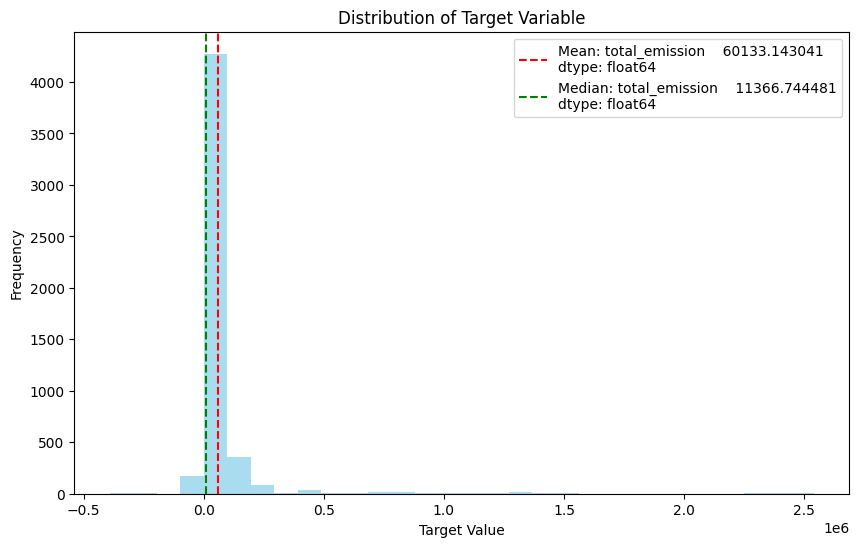

In [18]:
# Create a simple histogram
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=30, alpha=0.7, color='skyblue')
plt.axvline(y_train['total_emission'].mean(), color='red', linestyle='--', label=f'Mean: {y_train.mean()}')
plt.axvline(y_train['total_emission'].median(), color='green', linestyle='--', label=f'Median: {y_train.median()}')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.legend()
plt.show()